In [1]:
import pandas as pd

df = pd.read_csv("Superstore.csv", sep=';')
print(df.head())

                                     ID          ShipMode         State  \
0  1901fa82-3e4c-11f0-a7df-6c21638b8e2a     Second Class    California    
1  19025072-3e4c-11f0-a7df-6c21638b8e2a   Standard Class       Florida    
2  19027750-3e4c-11f0-a7df-6c21638b8e2a   Standard Class       Florida    
3  19029104-3e4c-11f0-a7df-6c21638b8e2a   Standard Class    California    
4  1902ac8e-3e4c-11f0-a7df-6c21638b8e2a   Standard Class    California    

        Category   Sales  Profit  Quantity  
0        Labels    14.62    6.87         2  
1        Tables   957.58 -383.03         5  
2       Storage    22.37    2.52         2  
3   Furnishings    48.86   14.17         7  
4           Art     7.28    1.97         4  


In [2]:
df = pd.get_dummies(df, columns=['ShipMode', 'State', 'Category'], drop_first=True)

In [3]:
import numpy as np

# Step 1: Create PerUnitSales = Sales / Quantity
df["PerUnitSales"] = df["Sales"] / df["Quantity"]

In [4]:
#Compute Z-score for PerUnitSales and Profit
for col in ['PerUnitSales', 'Profit']:
    mean = df[col].mean()
    std = df[col].std()
    df[f'{col}_zscore'] = (df[col] - mean) / std

    # Step 2: Replace outliers with mean if |z| > 3
    df.loc[df[f'{col}_zscore'].abs() > 3, col] = mean

In [5]:
X = df.drop(['ID', 'Sales', 'Profit', 'Quantity', 'PerUnitSales'], axis=1)
y = df[['PerUnitSales', 'Profit']]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [8]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [9]:
from sklearn.neural_network import MLPRegressor
model_nn = MLPRegressor(hidden_layer_sizes=(10,10), max_iter=500, random_state=1)
model_nn.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=500, random_state=1)

In [10]:
# prompt: i want to use random forest regressor as ML model

from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(model, label):
    y_pred = model.predict(X_test)
    print(f"{label} - MSE:", mean_squared_error(y_test, y_pred))
    print(f"{label} - R2 Score:", r2_score(y_test, y_pred))

evaluate(model_lr, "Linear Regression")
evaluate(model_tree, "Decision Tree")
evaluate(model_nn, "Neural Network")
evaluate(model_rf, "Random Forest")



Linear Regression - MSE: 4540.1495331775495
Linear Regression - R2 Score: 0.3765863376391466
Decision Tree - MSE: 296.5241077583246
Decision Tree - R2 Score: 0.9572905326162662
Neural Network - MSE: 787.3187593351295
Neural Network - R2 Score: 0.8908372638943761
Random Forest - MSE: 257.4742075614332
Random Forest - R2 Score: 0.9632730073304656


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(model, label):
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  print(f"{label} - R2 Score (Train):", r2_score(y_train, y_train_pred))
  print(f"{label} - R2 Score (Test):", r2_score(y_test, y_test_pred))

evaluate(model_lr, "Linear Regression")
evaluate(model_tree, "Decision Tree")
evaluate(model_nn, "Neural Network")
evaluate(model_rf, "Random Forest")


Linear Regression - R2 Score (Train): 0.36702385123194764
Linear Regression - R2 Score (Test): 0.3765863376391466
Decision Tree - R2 Score (Train): 1.0
Decision Tree - R2 Score (Test): 0.9572905326162662
Neural Network - R2 Score (Train): 0.9277609616120932
Neural Network - R2 Score (Test): 0.8908372638943761
Random Forest - R2 Score (Train): 0.998442289442889
Random Forest - R2 Score (Test): 0.9632730073304656


In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

new_SalesData = [['Standard Class', 'Wisconsin', 'Appliances']]

input_cols_for_prediction = ['ShipMode', 'State', 'Category']

original_input_cols = ['ShipMode', 'State', 'Category', 'Sales', 'Profit', 'Quantity']

new_data_df = pd.DataFrame(new_SalesData, columns=input_cols_for_prediction)

categorical_cols = ['ShipMode', 'State', 'Category']

new_data_encoded = pd.get_dummies(new_data_df, columns=categorical_cols, drop_first=True)

missing_cols = set(X_train.columns) - set(new_data_encoded.columns)
for c in missing_cols:
    new_data_encoded[c] = 0

new_data_encoded = new_data_encoded[X_train.columns]

# Predict with Linear Regression
pred_lr = model_lr.predict(new_data_encoded)
print("Predicted Sales/Profit (Linear Regression):", pred_lr[0])

# Predict with Decision Tree
pred_tree = model_tree.predict(new_data_encoded)
print("Predicted Sales/Profit (Decision Tree):", pred_tree[0])

# Predict with Neural Network
pred_nn = model_nn.predict(new_data_encoded)
print("Predicted Sales/Profit (Neural Network):", pred_nn[0])


# Predict with Random Forest
pred_nn = model_nn.predict(new_data_encoded)
print("Predicted Sales/Profit (Random Forest):", pred_nn[0])




Predicted Sales/Profit (Linear Regression): [86.53058496 98.79761059]
Predicted Sales/Profit (Decision Tree): [60.98 27.44]
Predicted Sales/Profit (Neural Network): [62.02101268 21.76699317]
Predicted Sales/Profit (Random Forest): [62.02101268 21.76699317]


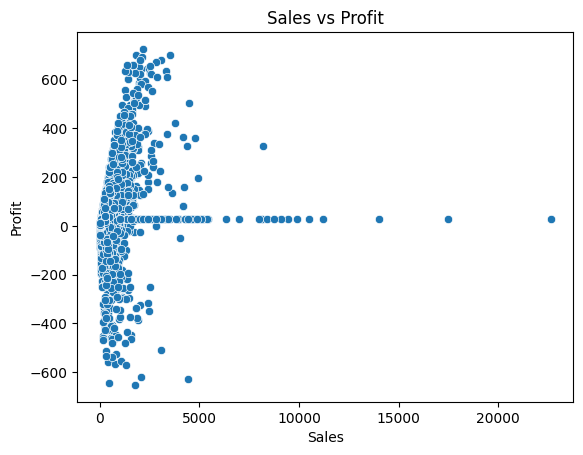

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt # Import matplotlib.pyplot

sns.scatterplot(data=df, x='Sales', y='Profit')
plt.title("Sales vs Profit")
plt.show()